In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2022-09-06 23:38:15.727176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 23:38:15.727269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's `make_blobs` method. The `make_blobs` is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the `make_blobs` method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. In our notebook, we can generate and visualize our dummy data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

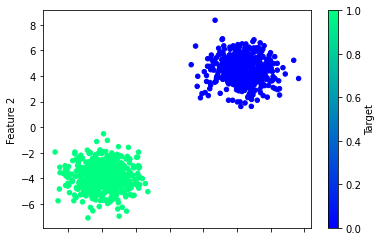

In [2]:
#generate dummy data
X,y= make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

#make dataframe with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"]= y

#plot dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's `train_test_split` method. In our notebook, enter the following code to generate the training and test datasets:

In [3]:
#use sklearn to make the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. 

In [4]:
#create scalar instance
X_scaler = skl.preprocessing.StandardScaler()

#fit scaler
X_scaler.fit(X_train)

#scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

To create the neural network in our notebook, first we must create our Sequential model. 

In [5]:
#create keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-09-06 23:38:47.412261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 23:38:47.412370: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 23:38:47.412446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (radeeznuts): /proc/driver/nvidia/version does not exist
2022-09-06 23:38:47.446992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
